In [1]:
using RHEOS
using PyPlot

┌ Info: Precompiling RHEOS [728860ae-c896-11e8-0b91-0f38ecad5046]
└ @ Base loading.jl:1278


In [2]:
KV = KelvinVoigt


Model name: KV

Free parameters: η and k

                        ___
                _________| |________
               |        _|_| η      |
           ____|                    |____
               |                    |
               |____╱╲  ╱╲  ╱╲  ____|
                      ╲╱  ╲╱  ╲╱
                                k
                

In [3]:
KV.expressions.use_G_integral

true

In [4]:
kv_model = RheoModel(KelvinVoigt, k = 4, η = 5)


Model: KV

Parameter values: (η = 5.0, k = 4.0) 

                        ___
                _________| |________
               |        _|_| η      |
           ____|                    |____
               |                    |
               |____╱╲  ╱╲  ╱╲  ____|
                      ╲╱  ╲╱  ╲╱
                                k
                

In [5]:
kv_model.flagi

LoadError: type RheoModel has no field flagi

## Create the RheoTimeData

In [6]:
datat = timeline(t_start=0, t_end=20.0, step = 0.02)
RheoTimeDataType(datat)

time_only::TimeDataType = 0

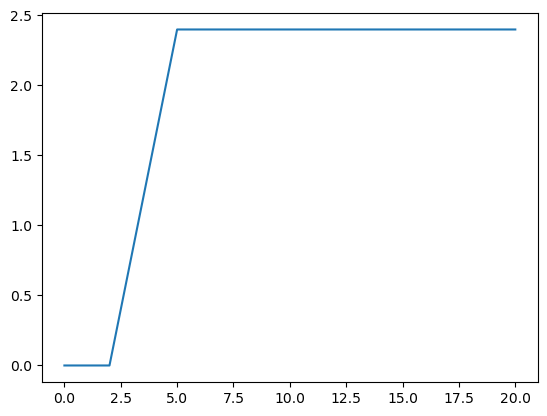

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000004A554B80>

In [7]:
# data = strainfunction(datat,hstep(offset=5.0,amp=5));
# data = strainfunction(datat,ramp(offset=2.0,gradient=0.8));
# data = strainfunction(datat, t->sin(t))
data = strainfunction(datat,ramp(offset=2.0,gradient=0.8)) - strainfunction(datat,ramp(offset=5.0,gradient=0.8));
plot(data.t, data.ϵ)

# modelpredict 

In [8]:
kv_model = RheoModel(KelvinVoigt, k = 4, η = 6)

data_pred = modelpredict(data, kv_model)

t =	0.0	0.02	0.04	0.06	0.08	0.1	0.12	0.14	0.16	0.18	...
ϵ =	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	...
σ =	-1.1549139070132422e-15	-5.774569535066211e-15	6.352026488572832e-15	-1.7323708605198633e-15	-4.619655628052969e-15	1.7323708605198633e-15	-1.1549139070132422e-15	6.929483442079453e-15	-1.3858966884158906e-14	-2.3098278140264844e-15	...


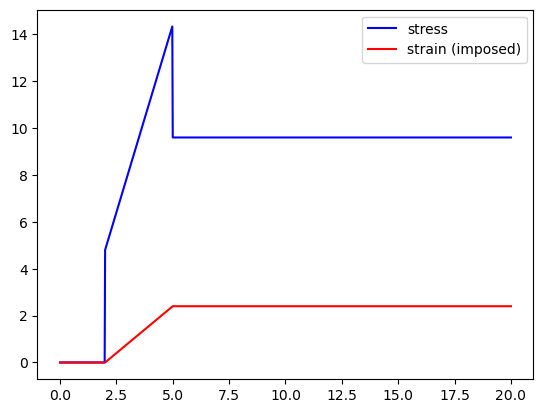

PyObject <matplotlib.legend.Legend object at 0x00000000467287C0>

In [9]:
plot(data_pred.t,data_pred.σ, "b")
plot(data_pred.t, data_pred.ϵ, "r")
legend(["stress", "strain (imposed)"])

## Modelfit, and then modelpredict

In [10]:
rkv_model2 = modelfit(data_pred, KelvinVoigt, strain_imposed)

┌ Warning: Initial values for model parameters are set to [0.5, 0.5] by default
└ @ RHEOS C:\Users\sanja\OneDrive\Documents\Engineering IIB\IIB Project\code\RHEOS.jl\src\processing.jl:304


Time: 0.3975692 s, Why: XTOL_REACHED, Parameters: [5.9999319314956665, 4.000004529953003], Error: 4.5120447284432047e-7



Model: KV

Parameter values: (η = 5.9999319314956665, k = 4.000004529953003) 

                        ___
                _________| |________
               |        _|_| η      |
           ____|                    |____
               |                    |
               |____╱╲  ╱╲  ╱╲  ____|
                      ╲╱  ╲╱  ╲╱
                                k
                

In [11]:
data_ext = extract(data,strain_only); 

# data_pred2 = modelpredict(data_ext, rkv_model2, diff_method = "BD")
data_pred2 = modelpredict(data_ext, rkv_model2)

t =	0.0	0.02	0.04	0.06	0.08	0.1	0.12	0.14	0.16	0.18	...
ϵ =	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	...
σ =	-4.619655628052969e-15	-2.1365907279744977e-14	-5.19711258155959e-15	4.619655628052969e-15	-5.774569535066211e-15	-1.9056079465718492e-14	-1.1549139070132422e-14	-1.039422516311918e-14	-6.929483442079453e-15	-1.09716821166258e-14	...


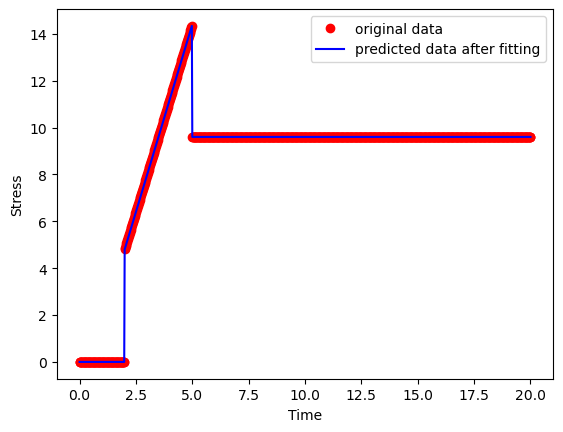

In [12]:
# Now we can plot data and model together for comparison
plot(data_pred.t,data_pred.σ, "or");
plot(data_pred2.t,data_pred2.σ, "b"); # data_pred2 is the predicted data after modelfit

legend(["original data", "predicted data after fitting"])
xlabel("Time");
ylabel("Stress");